In [81]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [82]:
cancer = load_breast_cancer()
df = pd.DataFrame(data= cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

In [83]:
df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [86]:
# Separating out the target
y = df.loc[:,['target']].values
x = df.drop(columns=['target'])
features = x.columns

In [87]:
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [88]:
# create principal components 
pca = PCA(n_components = 0.9)
principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2',
#                                                                 'principal component 3','principal component 4',      

In [89]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182, 0.09393163, 0.06602135, 0.05495768,
       0.04024522, 0.02250734])

In [90]:
pca.explained_variance_

array([13.30499079,  5.7013746 ,  2.82291016,  1.98412752,  1.65163324,
        1.20948224,  0.67640888])

In [91]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_
print(eig_values[0])
print(eig_vectors[0])

13.304990794374538
[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]


In [92]:
eig_values = pca.explained_variance_
eig_vectors = pca.components_
print(eig_values[1])
print(eig_vectors[1])

5.701374603726142
[-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


In [93]:
pc1 = pca.components_[0]
pc2 = pca.components_[1]

In [94]:
print(pc1)
print(pc2)

[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]
[-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
  0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
 -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
  0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
  0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]


In [114]:
# get the loadings
structure_loading_1 = pc1* np.sqrt(eig_values[0])
str_loading_1 = pd.Series(structure_loading_1, index=features).sort_values(ascending=False)
str_loading_1.iloc[:]

mean concave points        0.951490
mean concavity             0.942542
worst concave points       0.915132
mean compactness           0.872817
worst perimeter            0.863167
worst concavity            0.834453
worst radius               0.831641
mean perimeter             0.829965
worst area                 0.820238
mean area                  0.806101
mean radius                0.798469
perimeter error            0.770833
worst compactness          0.766346
radius error               0.751328
area error                 0.739987
concave points error       0.669033
compactness error          0.621527
concavity error            0.560234
mean smoothness            0.520110
mean symmetry              0.503978
worst fractal dimension    0.480695
worst smoothness           0.466720
worst symmetry             0.448307
worst texture              0.381062
mean texture               0.378346
fractal dimension error    0.374128
mean fractal dimension     0.234772
symmetry error             0

Text(0,0.5,'proportion of explained variance')

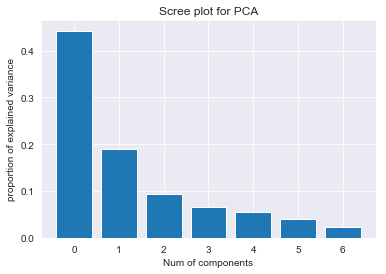

In [98]:
index = np.arange(7)
plt.bar(index, pca.explained_variance_ratio_)
plt.title('Scree plot for PCA')
plt.xlabel('Num of components')
plt.ylabel('proportion of explained variance')

## PC1 - SHAPE

In [111]:
# get the loadings
structure_loading_2 = pc2* np.sqrt(eig_values[1])
str_loading_2 = pd.Series(structure_loading_2, index=features).sort_values(ascending=False)

In [113]:
str_loading_2.iloc[:]

mean fractal dimension     0.875292
fractal dimension error    0.668791
worst fractal dimension    0.657443
compactness error          0.555669
smoothness error           0.488130
concavity error            0.470883
mean symmetry              0.454506
mean smoothness            0.444392
symmetry error             0.438984
worst smoothness           0.411421
mean compactness           0.362680
worst compactness          0.342865
worst symmetry             0.338783
concave points error       0.311176
worst concavity            0.233914
texture error              0.214849
mean concavity             0.143660
worst concave points      -0.019716
mean concave points       -0.083016
worst texture             -0.108565
mean texture              -0.142564
perimeter error           -0.213602
radius error              -0.252033
area error                -0.363638
worst perimeter           -0.477261
mean perimeter            -0.513800
worst area                -0.523759
worst radius              -0

## PC2 - Image rusults